In [2]:
#the data is from yahoo finance


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [4]:
df= pd.read_csv("BTC-USD.csv", date_parser= True)

In [38]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2517,2021-08-08,44574.437500,45282.351563,43331.910156,43798.117188,43798.117188,3.630266e+10
2518,2021-08-09,43791.925781,46456.832031,42848.687500,46365.402344,46365.402344,3.873408e+10
2519,2021-08-10,46280.847656,46637.988281,44705.554688,45585.031250,45585.031250,3.354602e+10
2520,2021-08-11,45599.703125,46735.632813,45351.710938,45593.636719,45593.636719,3.431971e+10


In [71]:
df_training= df[df['Date']<'2021-01-03'].copy()

In [72]:
df_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2295,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,4.526595e+10
2296,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,5.128744e+10
2297,2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,4.675496e+10
2298,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,4.073030e+10


In [73]:
df_training.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [74]:
df_test = df[df['Date']>'2021-01-03'].copy()

In [75]:
df_test

,Date,Open,High,Low,Close,Adj Close,Volume
2301,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,8.116348e+10
2302,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,6.754732e+10
2303,2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,7.528943e+10
2304,2021-01-07,36833.875000,40180.367188,36491.191406,39371.042969,39371.042969,8.476214e+10
2305,2021-01-08,39381.765625,41946.738281,36838.636719,40797.609375,40797.609375,8.810752e+10
...,...,...,...,...,...,...,...
2517,2021-08-08,44574.437500,45282.351563,43331.910156,43798.117188,43798.117188,3.630266e+10
2518,2021-08-09,43791.925781,46456.832031,42848.687500,46365.402344,46365.402344,3.873408e+10
2519,2021-08-10,46280.847656,46637.988281,44705.554688,45585.031250,45585.031250,3.354602e+10
2520,2021-08-11,45599.703125,46735.632813,45351.710938,45593.636719,45593.636719,3.431971e+10


In [76]:
df_train1= df_training.drop(['Date','Adj Close'], axis =1)

In [77]:
df_train1

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,2.105680e+07
1,456.859985,456.859985,413.104004,424.440002,3.448320e+07
2,424.102997,427.834991,384.532013,394.795990,3.791970e+07
3,394.673004,423.295990,389.882996,408.903992,3.686360e+07
4,408.084991,412.425995,393.181000,398.821014,2.658010e+07
...,...,...,...,...,...
2295,27081.810547,27370.720703,25987.298828,27362.437500,4.526595e+10
2296,27360.089844,28937.740234,27360.089844,28840.953125,5.128744e+10
2297,28841.574219,29244.876953,28201.992188,29001.720703,4.675496e+10
2298,28994.009766,29600.626953,28803.585938,29374.152344,4.073030e+10


In [78]:
# normalizing the data
minmax= MinMaxScaler()
df_train1= minmax.fit_transform(df_train1)

In [79]:
df_train1

array([[9.89628029e-03, 7.78435485e-03, 9.71352668e-03, 8.73985350e-03,
        2.04208427e-04],
       [9.58791846e-03, 7.44091638e-03, 8.35396791e-03, 7.71028001e-03,
        3.85277136e-04],
       [8.46608683e-03, 6.55985960e-03, 7.36599020e-03, 6.78243065e-03,
        4.31621846e-04],
       ...,
       [9.81681885e-01, 8.81304241e-01, 9.69253128e-01, 9.02171249e-01,
        6.30458660e-01],
       [9.86902360e-01, 8.92103070e-01, 9.90055361e-01, 9.13828256e-01,
        5.49209924e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        9.15154706e-01]])

In [80]:
X_train =[]
Y_train =[]


In [81]:
df_train1.shape

(2300, 5)

In [82]:
df_train1

array([[9.89628029e-03, 7.78435485e-03, 9.71352668e-03, 8.73985350e-03,
        2.04208427e-04],
       [9.58791846e-03, 7.44091638e-03, 8.35396791e-03, 7.71028001e-03,
        3.85277136e-04],
       [8.46608683e-03, 6.55985960e-03, 7.36599020e-03, 6.78243065e-03,
        4.31621846e-04],
       ...,
       [9.81681885e-01, 8.81304241e-01, 9.69253128e-01, 9.02171249e-01,
        6.30458660e-01],
       [9.86902360e-01, 8.92103070e-01, 9.90055361e-01, 9.13828256e-01,
        5.49209924e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        9.15154706e-01]])

In [84]:
for i in range(60, df_train1.shape[0]):
    X_train.append(df_train1[i-60:i])
    Y_train.append(df_train1[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape
    

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [85]:
X_train.shape

(2240, 60, 5)

In [86]:
X_train.shape[0]

2240

In [87]:
Y_train.shape

(2240,)

In [88]:
X_train

array([[[9.89628029e-03, 7.78435485e-03, 9.71352668e-03, 8.73985350e-03,
         2.04208427e-04],
        [9.58791846e-03, 7.44091638e-03, 8.35396791e-03, 7.71028001e-03,
         3.85277136e-04],
        [8.46608683e-03, 6.55985960e-03, 7.36599020e-03, 6.78243065e-03,
         4.31621846e-04],
        ...,
        [8.57465056e-03, 7.44798918e-03, 7.93968181e-03, 7.59431400e-03,
         7.15169477e-04],
        [8.27135768e-03, 6.29932241e-03, 7.37487647e-03, 6.87701850e-03,
         3.19276550e-04],
        [7.62864254e-03, 5.88272896e-03, 6.89834945e-03, 6.19828411e-03,
         1.32337377e-04]],

       [[9.58791846e-03, 7.44091638e-03, 8.35396791e-03, 7.71028001e-03,
         3.85277136e-04],
        [8.46608683e-03, 6.55985960e-03, 7.36599020e-03, 6.78243065e-03,
         4.31621846e-04],
        [7.45819510e-03, 6.42207774e-03, 7.55101938e-03, 7.22400720e-03,
         4.17379260e-04],
        ...,
        [8.27135768e-03, 6.29932241e-03, 7.37487647e-03, 6.87701850e-03,
        

In [89]:
y_train.shape

(2237,)

In [90]:
X_train.shape

(2240, 60, 5)

In [91]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout

In [92]:
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (60, 5)))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            11200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 120)              

In [97]:
model.compile(optimizer= 'adam', loss='mean_squared_error')

In [98]:
history= model.fit(X_train,y_train, epochs = 46, batch_size= 50, validation_split=0.1)

Epoch 1/46
41/41 [==============================] - ETA: 0s - loss: nan

ValueError: Data cardinality is ambiguous:
  x sizes: 224
  y sizes: 221
Make sure all arrays contain the same number of samples.

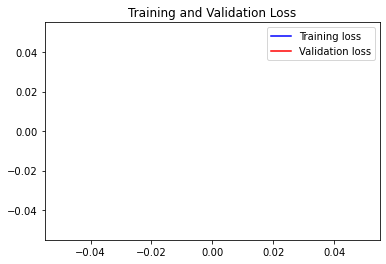

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()